<a href="https://colab.research.google.com/github/ninowwwup/Case_de_Estudos_Udemy./blob/main/Case_de_Estudos_Udemy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⭕Case de Estudo

Importando as Libs para análise dos dados

In [286]:
# Importando as libs para tratamento e manipulação dos dados

import pandas as pd
import numpy as np

# Importando as libs para visualização dos gráficos

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

Importando o database 

In [194]:
# Database em .xlsx (Excel)
# Por conter várias abas no dataset precisamos definor qual base iremos trabalhar inicialmente utilizando o 'sheet_name='

df_clientes = pd.read_excel('caso_estudo.xlsx', sheet_name='clientes')
df_lojas = pd.read_excel('caso_estudo.xlsx', sheet_name='lojas')
df_pagamentos = pd.read_excel('caso_estudo.xlsx', sheet_name='pagamentos')
df_produtos= pd.read_excel('caso_estudo.xlsx', sheet_name='produtos')
df_vendas = pd.read_excel('caso_estudo.xlsx', sheet_name='vendas')

# 📶Análise Exploratória






> Amostras e Filtros

> Observando a Coluna *'df_clientes'*







In [195]:
# Amostragem Simples Aleatória com 'sample()'

df_clientes.sample(5)

,id,nome,sexo,dt_nasc
109,110,Enzo Dias,M,5/1/1965
299,300,Isabela Souza,F,12/13/1995
804,805,Gustavo Souza,M,5/21/1987
528,529,Giovanna Barros,F,12/24/1984
771,772,Carolina Ferreira,F,7/31/1965


In [196]:
# Observando se há dados nulos nas COLUNAS

df_clientes.isnull().any()

id         False
nome        True
sexo        True
dt_nasc     True
dtype: bool

In [197]:
# Somando os dados nulos das COLUNAS

df_clientes.isnull().sum()

id         0
nome       4
sexo       4
dt_nasc    4
dtype: int64

Fazendo um filtro que verifica os dados nulos por LINHA EM CADA COLUNA

In [198]:
df_clientes[df_clientes.isnull().T.any()]

,id,nome,sexo,dt_nasc
263,264,NaN,F,7/29/1997
264,265,NaN,M,2/7/1979
268,269,NaN,F,NaN
269,270,NaN,M,NaN
276,277,Brenda Santos,F,NaN
282,283,Amanda Barros,F,NaN
287,288,Victor Ribeiro,NaN,12/17/1974
290,291,Clara Pinto,NaN,12/25/1980
294,295,Tiago Lima,NaN,7/26/1973
301,302,Guilherme Cardoso,NaN,3/9/1998


In [199]:
# Filtrando apenas a coluna 'Sexo', observamos a qtd de valores dentro dessa coluna

df_clientes.sexo.unique()

array(['F', 'M', nan], dtype=object)

In [200]:
# Observando a aba produtos

df_produtos

,id,produto,valor
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,xxx-231a,3211352.0


- Observamos que nesse boxplot acima de 3M indicando um Outlier

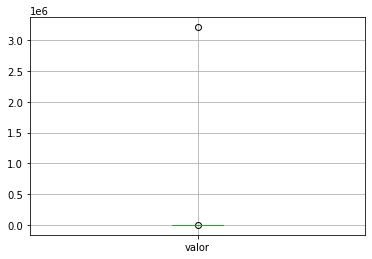

In [201]:
df_produtos.boxplot(column=['valor'])

- Através do filtro obtivemos o dado que está com valor discrepante

In [202]:
# Filtrando o valor que esteja exorbitantemente alto indicando um outlier

df_produtos[df_produtos.valor>3000000]

,id,produto,valor
9,10,xxx-231a,3211352.0


- Isolando apenas o outlier (sem dropar) e utilizando o filtro, agora temos as informações dos dados corretamente

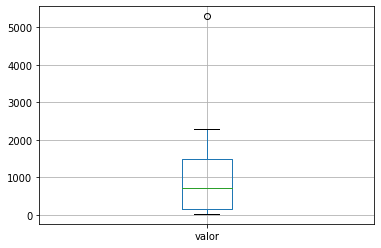

In [203]:
df_produtos[df_produtos.valor < 3000000].boxplot(column=['valor'])

- Agora vamos observar melhor o dado com Id 10, dentro do dataframe de Vendas

In [204]:
# Observamos que há algumas vendas 

df_vendas[df_vendas.id_produto==10]

,id,id_cliente,id_loja,id_produto,dt_venda
7,8,543,10,10,2018-01-06
9,10,724,3,10,2018-01-07
20,21,270,2,10,2018-01-12
22,23,665,10,10,2018-01-12
28,29,299,5,10,2018-01-13
...,...,...,...,...,...
2906,2907,907,2,10,2020-08-23
2946,2947,387,3,10,2020-09-10
2956,2957,35,7,10,2020-09-14
2966,2967,405,3,10,2020-09-17


In [205]:
# Somando as vendas do ID 10

df_vendas[df_vendas.id_produto==10].count()

id            182
id_cliente    182
id_loja       182
id_produto    182
dt_venda      182
dtype: int64



> Dessa forma observamos que existe 182 vendas com essa Id 10, sendo assim não podemos simplismente deletar esse dado, deveras uma colsulta deve ser feita ao cliente sobre esse as informações desse dado



In [206]:
# Observando agora a tabela de vendas

df_vendas

,id,id_cliente,id_loja,id_produto,dt_venda
0,1,393,9,3,2018-01-04
1,2,417,9,3,2018-01-04
2,3,374,7,8,2018-01-04
3,4,59,4,3,2018-01-05
4,5,18,9,1,2018-01-05
...,...,...,...,...,...
2995,2996,671,3,7,2020-09-27
2996,2997,586,8,3,2020-09-27
2997,2998,731,2,4,2020-09-27
2998,2999,163,2,1,2020-09-27


In [207]:
# Vendo se ha dados faltantes

df_vendas.isnull().sum()

id            0
id_cliente    0
id_loja       0
id_produto    0
dt_venda      0
dtype: int64

In [208]:
df_vendas.describe()

,id,id_cliente,id_loja,id_produto
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,500.763667,4.538333,4.435000
std,866.169729,285.322282,2.922221,2.511018
min,1.000000,1.000000,1.000000,1.000000
25%,750.750000,254.750000,2.000000,3.000000
50%,1500.500000,503.500000,4.000000,3.000000
75%,2250.250000,742.000000,7.000000,6.000000
max,3000.000000,1000.000000,10.000000,10.000000


In [209]:
# Observando agora a tabela de Pagamentos

df_pagamentos

,id,id_venda,dt_pgto
0,1,1,2018-01-24
1,2,2,2018-02-17
2,3,3,2018-02-14
3,4,5,2018-01-23
4,5,7,2018-02-15
...,...,...,...
2067,2068,2990,2020-10-04
2068,2069,2992,2020-10-10
2069,2070,2994,2020-10-09
2070,2071,2996,2020-10-17


In [210]:
# Vendo se ha dados faltantes

df_pagamentos.isnull().sum()

id          0
id_venda    0
dt_pgto     0
dtype: int64

In [211]:
df_pagamentos.describe()

,id,id_venda
count,2072.000000,2072.000000
mean,1036.500000,1491.731660
std,598.279199,864.865583
min,1.000000,1.000000
25%,518.750000,746.250000
50%,1036.500000,1501.500000
75%,1554.250000,2220.500000
max,2072.000000,2997.000000


# 📶 Data Cleanning (Limpeza dos Dados)

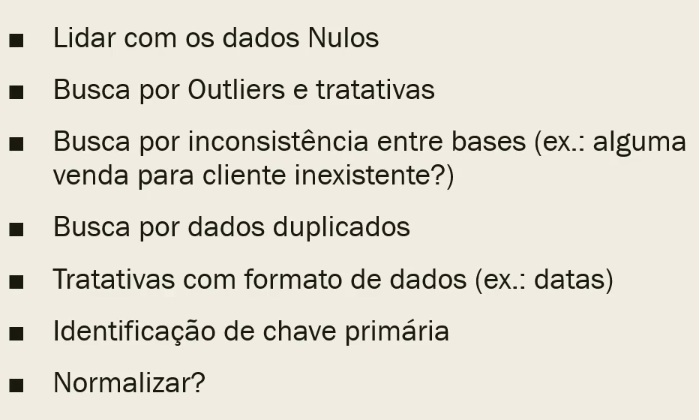

## **❌ Dados Nulos**

- Utilizando o .loc que acessa um registro dado uma linha e uma coluna
- O comando .loc é comumente utilizado quando se que acessar um registro, modificar, ou substitui-lo

In [212]:
df_clientes

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,5/2/1975
1,2,Caio Pereira,M,4/16/1978
2,3,Júlio Azevedo,M,11/4/1952
3,4,Sarah Goncalves,F,2/24/1937
4,5,Gabrielle Martins,F,5/6/1953
...,...,...,...,...
995,996,Ágatha Ribeiro,F,2/8/1946
996,997,Laura Oliveira,F,6/15/1979
997,998,Lara Oliveira,F,3/15/1946
998,999,Julian Cunha,M,6/20/1994


In [213]:
# Substituindo os registro nulos dentro da coluna 'nome' que estão como Nan por 'Sem nome'
# Substituindo os registro nulos dentro da coluna 'sexo' por 'O' (de Outros)
# Substituindo os registro nulos dentro da coluna 'df_nasc' por uma data que ficará de fácil análise posteriormente

df_clientes.loc[df_clientes.nome.isnull(),'nome'] = 'Sem nome'
df_clientes.loc[df_clientes.sexo.isnull(),'sexo'] = 'O'
df_clientes.loc[df_clientes.dt_nasc.isnull(),'dt_nasc'] = '1/1/2020'

In [214]:
# Acessando os valores utilizando o index

df_clientes.loc[[269, 287], :]

,id,nome,sexo,dt_nasc
269,270,Sem nome,M,1/1/2020
287,288,Victor Ribeiro,O,12/17/1974


- Agora verificamos se ainda há dados nulos em todos os Dataframes

In [215]:
# Verificando se ainda há dados nulos em df_clientes

df_clientes.isnull().sum()

id         0
nome       0
sexo       0
dt_nasc    0
dtype: int64

In [216]:
# Verificando se ainda há dados nulos em df_lojas

df_lojas.isnull().sum()

id        0
cidade    0
dtype: int64

In [217]:
# Verificando se ainda há dados nulos em df_vendas

df_vendas.isnull().sum()

id            0
id_cliente    0
id_loja       0
id_produto    0
dt_venda      0
dtype: int64

In [218]:
# Verificando se ainda há dados nulos em df_pagamentos

df_pagamentos.isnull().sum()

id          0
id_venda    0
dt_pgto     0
dtype: int64

## **❌ Outliers**

- A busca por outliers deve ser apenas por dados numéricos, não existe outliers se for nome, string, data (excesões se estiver muito fora do padrão)

**Outliers em dados numméricos**

In [219]:
df_produtos

,id,produto,valor
0,1,mouse,20.0
1,2,teclado,30.0
2,3,laptop básico,2300.0
3,4,laptop gamer,5300.0
4,5,monitor,1500.0
5,6,impressora,700.0
6,7,carregador,150.0
7,8,cadeira,540.0
8,9,mesa,860.0
9,10,xxx-231a,3211352.0


In [220]:
# Utilizando a coluna de index, usando um filtro para localizar o dado com outlier
# Dividindo esse valor afim de que se faça sentido

df_produtos.loc[9, 'valor'] = df_produtos.valor[9] / 10000
df_produtos

,id,produto,valor
0,1,mouse,20.0000
1,2,teclado,30.0000
2,3,laptop básico,2300.0000
3,4,laptop gamer,5300.0000
4,5,monitor,1500.0000
5,6,impressora,700.0000
6,7,carregador,150.0000
7,8,cadeira,540.0000
8,9,mesa,860.0000
9,10,xxx-231a,321.1352


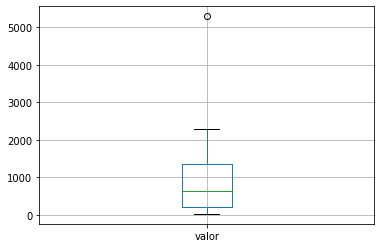

In [221]:
df_produtos.boxplot(column=['valor']);

## **❌ Consistências**

- É garantir que uma tabela consiga comunicar-se com a outras tabelas sem a presença de dados nulos, outliers, ou dados que não se conectem, essas etapas devem ser trabalhadas sempre antes.

> Buscando por vendas que não possuem clientes

In [222]:
df_vendas

,id,id_cliente,id_loja,id_produto,dt_venda
0,1,393,9,3,2018-01-04
1,2,417,9,3,2018-01-04
2,3,374,7,8,2018-01-04
3,4,59,4,3,2018-01-05
4,5,18,9,1,2018-01-05
...,...,...,...,...,...
2995,2996,671,3,7,2020-09-27
2996,2997,586,8,3,2020-09-27
2997,2998,731,2,4,2020-09-27
2998,2999,163,2,1,2020-09-27


In [223]:
df_clientes

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,5/2/1975
1,2,Caio Pereira,M,4/16/1978
2,3,Júlio Azevedo,M,11/4/1952
3,4,Sarah Goncalves,F,2/24/1937
4,5,Gabrielle Martins,F,5/6/1953
...,...,...,...,...
995,996,Ágatha Ribeiro,F,2/8/1946
996,997,Laura Oliveira,F,6/15/1979
997,998,Lara Oliveira,F,3/15/1946
998,999,Julian Cunha,M,6/20/1994


- O que esse comando está fazendo?

Estou pegando apenas a coluna **id_clientes** dentro da tabela de **id_vendas**, e estou avaliando quais os ids **estão** também dentro da coluna id do dataframe **id_clientes**

In [224]:
df_vendas.id_cliente.isin(df_clientes.id)

0       True
1       True
2       True
3       True
4       True
        ... 
2995    True
2996    True
2997    True
2998    True
2999    True
Name: id_cliente, Length: 3000, dtype: bool

- Com o comando ~ invertemos o filtro para procurar os ids que **não estão** dentro da coluna id do dataframe id_clientes

- Com isso obtemos atravezz do any(), que não temos vendas que não possuam clientes

In [225]:
~df_vendas.id_cliente.isin(df_clientes.id).any()

False

- Com isso vemos que os dados estão consistentes pois não há  os ids clientes que não estão dentro do conjunto de id_cleintes

In [226]:
# Visualizando por completo 
# Os ids clientes que não estão dentro do conjunto de id_cleintes

df_vendas[~df_vendas.id_cliente.isin(df_clientes.id)].count()

id            0
id_cliente    0
id_loja       0
id_produto    0
dt_venda      0
dtype: int64

In [227]:
# Verificando em lojas

df_vendas[~df_vendas.id_loja.isin(df_lojas.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


In [228]:
# Verificando em Produtos

df_vendas[~df_vendas.id_produto.isin(df_produtos.id)]

,id,id_cliente,id_loja,id_produto,dt_venda


Com  isso vemos que o filtro retornou nulo para a verificalçao em id_cleintes, id_lojas e id_produtos. Se tivesse algum dado faltante ele seria apresentado

- Buscando pagamentos que não possuam id de vendas

- Não existe ids de vendas apresentados dentro do dataframe de pagamentos, que não exista.

In [229]:
df_pagamentos[~df_pagamentos.id_venda.isin(df_vendas.id)]

,id,id_venda,dt_pgto


- Agora vamos avaliar se todas as vendas geraram pagamentos

- Com o filtro obetmos as vendas que não geraram pagamentos

In [230]:
''' Visualizando o dataframe de vendas (df_vendas), 
gerando um filtro nele, de forma que eu quero aqueles registros
em que, a minha coluna id de vendas (id_vendas), 
não está dentro do dataframe pagamentos (df_pagamentos) 
na coluna id_vendas '''

df_vendas[~df_vendas.id.isin(df_pagamentos.id_venda)].count()

id            928
id_cliente    928
id_loja       928
id_produto    928
dt_venda      928
dtype: int64

✅ Com isso obtemos 928 vendas que não geraram pagamentos **(Casos de supostos inadimplências)**

## **❌ Duplicados**

In [231]:
df_clientes

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,5/2/1975
1,2,Caio Pereira,M,4/16/1978
2,3,Júlio Azevedo,M,11/4/1952
3,4,Sarah Goncalves,F,2/24/1937
4,5,Gabrielle Martins,F,5/6/1953
...,...,...,...,...
995,996,Ágatha Ribeiro,F,2/8/1946
996,997,Laura Oliveira,F,6/15/1979
997,998,Lara Oliveira,F,3/15/1946
998,999,Julian Cunha,M,6/20/1994


- Com esse filtro obtemos 109 resgistros de nomes duplicados

In [232]:
# Verificando dados duplicados dentro da coluna 'nome'

df_clientes.nome.duplicated().sum()

109

In [233]:
# Fazendo um filtro para verificar a existencia de dados duplicados dentro de df_clientes

df_clientes[df_clientes.nome.duplicated()]

,id,nome,sexo,dt_nasc
79,80,Anna Melo,F,8/10/1999
96,97,Beatrice Goncalves,F,11/22/1964
138,139,Kauê Araujo,M,5/31/1974
139,140,Leonor Sousa,F,8/2/1981
154,155,Luis Rodrigues,M,7/3/1973
...,...,...,...,...
986,987,Beatriz Cardoso,F,7/17/1984
990,991,Diogo Melo,M,7/24/2001
993,994,Eduardo Costa,M,12/18/1963
996,997,Laura Oliveira,F,6/15/1979


- Vemos que há dois registros com o mesmo nome, porém datas de nasc diferentes, o que provavelmente sejam pessoas distintas

In [234]:
# Analisando melhor o primeiro registro

df_clientes[df_clientes.nome=='Anna Melo']

,id,nome,sexo,dt_nasc
66,67,Anna Melo,F,11/6/1995
79,80,Anna Melo,F,8/10/1999


In [235]:
# Verificando se há linhas de registros que se repetem

df_clientes.duplicated().sum()

0

- Obtemos relamente a certeza que não há registros que se repetem igualmetnte em todo o dataframe, mesmo excluindo a coluna id

In [236]:
# Dropando a coluna id e ainda verificando se gá registros que se repetem 

df_clientes.drop('id', axis=1).duplicated().sum()

0

- Também não há registros duplicados 

In [237]:
# Verificando a coluna produto no dataframe de produtos

df_produtos.produto.duplicated().sum()

0

- Também em lojas obtemos a informação que não há dados duplicados

In [238]:
# Verificando a coluna cidades no dataframe de lojas

df_lojas.cidade.duplicated().sum()

0

In [239]:
# Verificando o dataframe de lojas

df_vendas

,id,id_cliente,id_loja,id_produto,dt_venda
0,1,393,9,3,2018-01-04
1,2,417,9,3,2018-01-04
2,3,374,7,8,2018-01-04
3,4,59,4,3,2018-01-05
4,5,18,9,1,2018-01-05
...,...,...,...,...,...
2995,2996,671,3,7,2020-09-27
2996,2997,586,8,3,2020-09-27
2997,2998,731,2,4,2020-09-27
2998,2999,163,2,1,2020-09-27


In [240]:
# Primeiramente retirando a coluna id, para não dar erro na filtragem

df_vendas.drop('id', axis=1).duplicated().sum()

1

- Vemos que o cliente 559 fez duas compras, obtemos apenas um registos de 2 desse cliente

In [241]:
# Acessando esse dado

df_vendas[df_vendas.drop('id', axis=1).duplicated()]

,id,id_cliente,id_loja,id_produto,dt_venda
496,497,559,2,5,2018-06-22


- Nesse caso fica a par de analisar se o mesmo cliente compro duas vezes o mesmo produto, ou se foi erro de sistema e contabilizou duas vezes a mesma venda

In [242]:
# Indo mais além, acessando os dois registros que aparecem como duplicados

df_vendas[ (df_vendas.id_cliente==559) & (df_vendas.id_loja==2) & (df_vendas.id_produto==5) ]

,id,id_cliente,id_loja,id_produto,dt_venda
495,496,559,2,5,2018-06-22
496,497,559,2,5,2018-06-22


- Também não há dados duplicados em df_pagamentos

In [243]:
# Verificanso se há dados duplicados em pagamentos

df_pagamentos.drop('id', axis=1).duplicated().sum()

0

## **❌ Formato de Dados**

> Analizando o df_clientes, observamos que o fortmato de datas não se encontram com um padrão

In [244]:
df_clientes

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,5/2/1975
1,2,Caio Pereira,M,4/16/1978
2,3,Júlio Azevedo,M,11/4/1952
3,4,Sarah Goncalves,F,2/24/1937
4,5,Gabrielle Martins,F,5/6/1953
...,...,...,...,...
995,996,Ágatha Ribeiro,F,2/8/1946
996,997,Laura Oliveira,F,6/15/1979
997,998,Lara Oliveira,F,3/15/1946
998,999,Julian Cunha,M,6/20/1994


In [245]:
# Alterando o formato de datas

df_clientes.dt_nasc = pd.to_datetime(df_clientes.dt_nasc, format='%m/%d/%Y') # O T maiúsculo indica que  são 4 dígitos
df_clientes

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,1975-05-02
1,2,Caio Pereira,M,1978-04-16
2,3,Júlio Azevedo,M,1952-11-04
3,4,Sarah Goncalves,F,1937-02-24
4,5,Gabrielle Martins,F,1953-05-06
...,...,...,...,...
995,996,Ágatha Ribeiro,F,1946-02-08
996,997,Laura Oliveira,F,1979-06-15
997,998,Lara Oliveira,F,1946-03-15
998,999,Julian Cunha,M,1994-06-20


## **❌ Chave Primária (Index)**

> Num dataframe 'A chave Primária' se refere ao 'Index'

- Dentro de um dataframe identificamos um indicador único para cada linha (index), como também identificamos o id, que diferente do index, o id foi criado em uma tabela externa, o index é gerado automaticamente pelo Pandas

- O que precisamos fazer é converter o id, para que ele seja o próprio index, isso facilitará para que possamos unir as bases de dados posteriormente.

In [246]:
df_clientes

,id,nome,sexo,dt_nasc
0,1,Lavinia Sousa,F,1975-05-02
1,2,Caio Pereira,M,1978-04-16
2,3,Júlio Azevedo,M,1952-11-04
3,4,Sarah Goncalves,F,1937-02-24
4,5,Gabrielle Martins,F,1953-05-06
...,...,...,...,...
995,996,Ágatha Ribeiro,F,1946-02-08
996,997,Laura Oliveira,F,1979-06-15
997,998,Lara Oliveira,F,1946-03-15
998,999,Julian Cunha,M,1994-06-20


In [247]:
# Conversão de id-index

df_clientes = df_clientes.set_index('id')
df_clientes

,nome,sexo,dt_nasc
id,,,
1,Lavinia Sousa,F,1975-05-02
2,Caio Pereira,M,1978-04-16
3,Júlio Azevedo,M,1952-11-04
4,Sarah Goncalves,F,1937-02-24
5,Gabrielle Martins,F,1953-05-06
...,...,...,...
996,Ágatha Ribeiro,F,1946-02-08
997,Laura Oliveira,F,1979-06-15
998,Lara Oliveira,F,1946-03-15


✅ Agora não acessaremos mais o id pela coluna Id como string

- Agora não temos mais a coluna id, ela é o próprio index

In [248]:
df_clientes.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
             991,  992,  993,  994,  995,  996,  997,  998,  999, 1000],
           dtype='int64', name='id', length=1000)

In [249]:
# Transformando nos outros dataframes

df_lojas = df_lojas.set_index('id')
df_produtos = df_produtos.set_index('id')
df_vendas = df_vendas.set_index('id')
df_pagamentos = df_pagamentos.set_index('id')

In [250]:
df_produtos

,produto,valor
id,,
1,mouse,20.0000
2,teclado,30.0000
3,laptop básico,2300.0000
4,laptop gamer,5300.0000
5,monitor,1500.0000
6,impressora,700.0000
7,carregador,150.0000
8,cadeira,540.0000
9,mesa,860.0000


# 📶 Data Fusion (Integração das Bases)

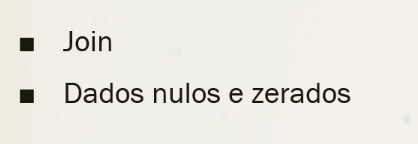

> Para junção das bases é necessário enterdermos primeiramente, qual a base de dados quegera a informação principal, a que possui a maior granularidade de informações.

## ❗Join

In [251]:
# A nossa principal tabel é a df_vendas

df_vendas

,id_cliente,id_loja,id_produto,dt_venda
id,,,,
1,393,9,3,2018-01-04
2,417,9,3,2018-01-04
3,374,7,8,2018-01-04
4,59,4,3,2018-01-05
5,18,9,1,2018-01-05
...,...,...,...,...
2996,671,3,7,2020-09-27
2997,586,8,3,2020-09-27
2998,731,2,4,2020-09-27


In [252]:
# Unindo duas tabelas
# Add um prefixo para cada coluna 'cliente_'
# Colocando a junção das duas tabelas dentro de uma nova variável


df = df_vendas.join(df_clientes.add_prefix('cliente_'), on='id_cliente')

# Unindo as outras bases

df = df.join(df_lojas.add_prefix('loja_'), on='id_loja')
df = df.join(df_produtos.add_prefix('produto_'), on='id_produto')

In [253]:
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor
id,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0
...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0


In [254]:
# Conferindo se deu certo, acessado um registro

df_clientes.loc[393]

nome             Gustavo Silva
sexo                         M
dt_nasc    1950-01-04 00:00:00
Name: 393, dtype: object

- Agora vamos criar uma coluna para identidicarmos a data de pagamento dentro da nova variável

> Como não temos nenhuma coluna que se relacione com outros dataframes, utilizamos o próprio index de abas as colunas df_pagamentos com a coluna de id_vendas

In [255]:
df = df.join(df_pagamentos.set_index('id_venda'))
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto
id,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23
...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT


## ❗Dados Nulos e Zerados

- Identificamos apenas 1 coluna que há dados nulos

In [256]:
df.isnull().sum()

id_cliente           0
id_loja              0
id_produto           0
dt_venda             0
cliente_nome         0
cliente_sexo         0
cliente_dt_nasc      0
loja_cidade          0
produto_produto      0
produto_valor        0
dt_pgto            928
dtype: int64

# 📶 Featuring Engineering (Criando Novos Dados)

Faça perguntas que você gostaria de responder!
- Quais lojas mais vendem?
-
Quais produtos mais vendem? Quais lojas geram maior receita?
- Quais produtos geram maior receita?
- Existe algum cliente que mais realiza compras?
-
Existe alguma relação entre loja e cliente?
- **Qual o tempo médio entre compra e pagamento? (tempo_pg)**
-
Existe alguma loja em que esse tempo é menor? E produto?
- **Qual produto mais gera inadimplência? (pg)**
- Qual loja tem mais inadimplências?
- **Existe alguma relação entre idade e inadimplência? (cliente_idade)**
- É possível prever inadimplência através dos dados idade, cidade e produto?

- Inicialmente vamos criar uma nova coluna dentro da variável df, afim de informar se há pagamento ou não

<!--  -->

In [257]:
'''Primeiro estou buscando todos os registros em que há dados nulos dentro da coluna "dt_pgto",
utilizando justamente o .loc, que nos ajuda a localizar esses dados e a alterar o dado em si, sendo que para coluna "pg"
os dados nulos em dt_pgto sejam vertidos para 0'''

df['pg'] = 1
df.loc[df.dt_pgto.isnull(), 'pg'] = 0
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg
id,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0


## ✅ Tempo de Pagamento

In [258]:
'''O tempo de pgto se da pela subtração da data de pgto menos a data da venda'''
# .days fará com que a informação seeja convertida para números em dias
# Os dados Nan supostamente foram em dias em que não houve pagamento

df['tempo_pg'] = (df.dt_pgto - df.dt_venda).dt.days
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg
id,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN


## ✅ idade do Cliente

In [259]:
# Passo 1 Inicialmete subtraimos da data atual menos a data de nasc do cliente
# Passo 2 E dividimos essa subtração por uma fução do numpy que é o timedelta64
# Passo 3 Dessa forma, obtivemos as idades atuais dos clientes em números decimais
# Passo 4 Com o np.floor(Similiar ao .round, que arredonda para inteiros) ele arredondamos para baixo o valor de decimal para inteiro
# Passo 5 Colocamos toda a informação dentro de uma nova coluna 

df['cliente_idade'] = np.floor((pd.to_datetime('today') - df.cliente_dt_nasc) / np.timedelta64(1, 'Y'))
df

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,loja_cidade,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade
id,,,,,,,,,,,,,,
1,393,9,3,2018-01-04,Gustavo Silva,M,1950-01-04,Palmas,laptop básico,2300.0,2018-01-24,1,20.0,72.0
2,417,9,3,2018-01-04,Leonor Almeida,F,1972-01-31,Palmas,laptop básico,2300.0,2018-02-17,1,44.0,50.0
3,374,7,8,2018-01-04,André Alves,M,1962-08-03,Salvador,cadeira,540.0,2018-02-14,1,41.0,60.0
4,59,4,3,2018-01-05,Rodrigo Ribeiro,M,1941-11-05,Belo Horizonte,laptop básico,2300.0,NaT,0,NaN,81.0
5,18,9,1,2018-01-05,Antônio Azevedo,M,1941-04-15,Palmas,mouse,20.0,2018-01-23,1,18.0,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2996,671,3,7,2020-09-27,Ana Goncalves,F,1999-10-31,Curitiba,carregador,150.0,2020-10-17,1,20.0,23.0
2997,586,8,3,2020-09-27,Aline Pinto,F,1994-03-29,Brasília,laptop básico,2300.0,2020-10-02,1,5.0,28.0
2998,731,2,4,2020-09-27,Otávio Silva,M,1986-05-04,Rio de Janeiro,laptop gamer,5300.0,NaT,0,NaN,36.0


# 📶 Exportando o dataset finalizado e pronto para as análises 

In [260]:
# Esse comando tmb já faz o download do arquivo localmente

''' 
df.to_csv('df.csv')
from google.colab import files
files.download("df.csv")   
'''

' \ndf.to_csv(\'df.csv\')\nfrom google.colab import files\nfiles.download("df.csv")   \n'

# 📶 Como Iniciar a Análise de Dados?

## ⚠️ Guia de Análise de Dados

> Sobre a área de dados temos algumas perguntas e hipótesis que podemos fazer ao analisarmos algum database, um gruia bem estruturado de planejamento linear deve ser aplicado para uma análise exploratória e explanatória de excelêcia. Os gráficos plotados devem ser escolhido de forma que venha fazer sentido com as informações que se deseja mostrar. Cada segmento de gráfico atende a uma forma específica de plotagem. Os insights devem fazer sentido ao banco de dados que temos. Uma boa tratativa e manipulação dos dados geram progresões Machine Learning mais acertivos e próximos da realidade.

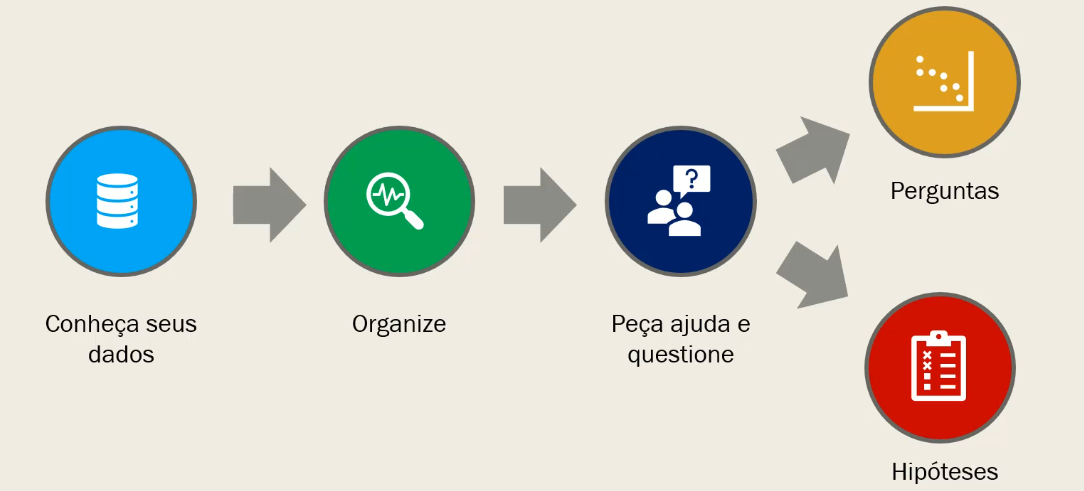

## ⚠️ Gráficos

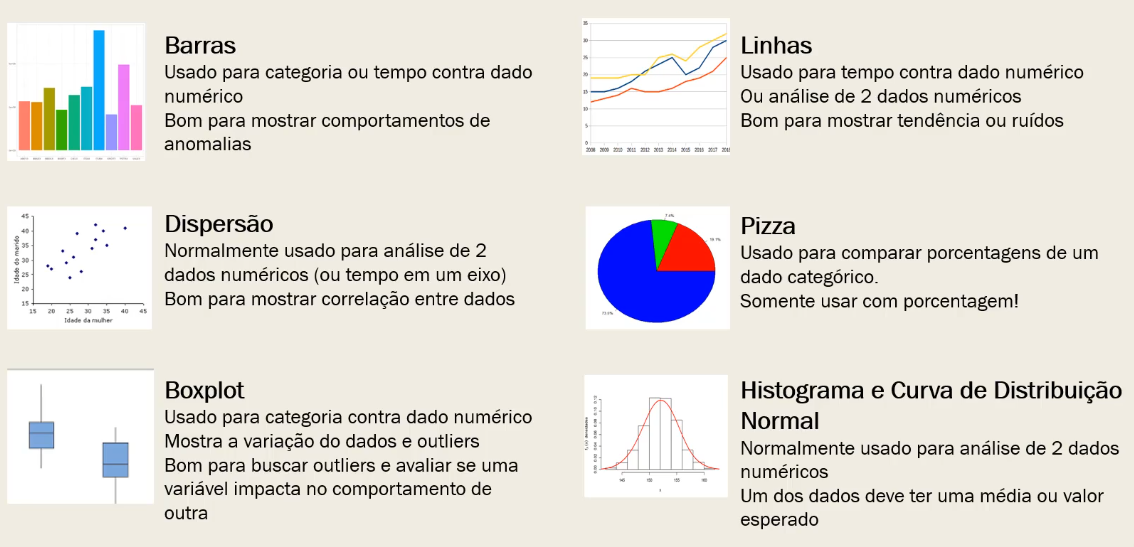

# 📶 Insights

## ⚠️ Questão de Negócio


■ Quais lojas mais vendem?

■ Quais produtos mais vendem?

■ Quais lojas geram maior receita?

■ Quais produtos geram maior receita?

■ Existe algum cliente que gera maior receita?

■ Qual o tempo médio entre compra e pagamento?

■ Existe alguma loja em que esse tempo é menor? E produto?

■ Existem alguma receita usando combinação entre produto e loja que mais se destaca?

■ Qual produto gera maior inadimplência?

■ Qual loja tem maior inadimplências?

■ Existe sazonalidade? por loja? por produto?

■ As vendas estão crescendo a cada ano?

■ A loja que mais vende é a que mais gera inadimplência?

■ Existe alguma relação entre idade e inadimplência?


❗****Quesão de Machine Learning!****

■ É possível prever inadimplência através dos dados idade, cidade e produto?

# 📶 Análises de Vendas e Receitas

## ✔️ Lojas que mais vendem

> Para sabermos as lojas que mais vendem é necessário fazermos um agrupamento pela cidade da loja

- Ao fazermos o groupby pela cidades, verificamos que o pandas não exibe nada pois o dataframe foi dividido em subdataframes, um subdataframe para cada cidade distinta.

ex.: Salvador - temos apenas os dados referentes a essa cidade; Belo Horizonte - apenas os dados referentes a ele

In [261]:
df.groupby('loja_cidade')

- Com o comando count() obtemos a contagem dos valores de cada coluna agrupados em cidades

In [262]:
df.groupby('loja_cidade').count()

,id_cliente,id_loja,id_produto,dt_venda,cliente_nome,cliente_sexo,cliente_dt_nasc,produto_produto,produto_valor,dt_pgto,pg,tempo_pg,cliente_idade
loja_cidade,,,,,,,,,,,,,
Belo Horizonte,221,221,221,221,221,221,221,221,221,181,221,181,221
Brasília,223,223,223,223,223,223,223,223,223,193,223,193,223
Curitiba,193,193,193,193,193,193,193,193,193,167,193,167,193
Palmas,202,202,202,202,202,202,202,202,202,180,202,180,202
Recife,211,211,211,211,211,211,211,211,211,186,211,186,211
Rio de Janeiro,1087,1087,1087,1087,1087,1087,1087,1087,1087,415,1087,415,1087
Salvador,234,234,234,234,234,234,234,234,234,214,234,214,234
Santa Catarina,191,191,191,191,191,191,191,191,191,156,191,156,191
São Paulo,207,207,207,207,207,207,207,207,207,183,207,183,207


- Aplicando o sum(), obtemos a soma dos dados de cada culuna para cada cidade

In [263]:
df.groupby('loja_cidade').sum()

,id_cliente,id_loja,id_produto,produto_valor,pg,tempo_pg,cliente_idade
loja_cidade,,,,,,,
Belo Horizonte,118977,884,977,3.757225e+05,181,3879.0,11343.0
Brasília,113427,1784,968,3.779836e+05,193,4298.0,11777.0
Curitiba,98133,579,861,3.032404e+05,167,3933.0,10308.0
Palmas,94409,1818,956,3.168370e+05,180,4193.0,10814.0
Recife,105369,1266,961,3.329236e+05,186,4148.0,11111.0
Rio de Janeiro,530385,2174,4797,1.797907e+06,415,9696.0,57066.0
Salvador,115115,1638,1052,3.752382e+05,214,4632.0,12404.0
Santa Catarina,101008,955,818,3.133314e+05,156,3084.0,10127.0
São Paulo,110652,207,847,3.407579e+05,183,4225.0,10696.0


- Aqui já temos a RECEITA de todos os produtos por cidade

In [264]:
df.groupby('loja_cidade').sum().produto_valor

loja_cidade
Belo Horizonte    3.757225e+05
Brasília          3.779836e+05
Curitiba          3.032404e+05
Palmas            3.168370e+05
Recife            3.329236e+05
Rio de Janeiro    1.797907e+06
Salvador          3.752382e+05
Santa Catarina    3.133314e+05
São Paulo         3.407579e+05
Vitória           3.655850e+05
Name: produto_valor, dtype: float64

- ✅ Porém queremos apenas a contagem dos produtos por cidade, ou seja, a qtd de produtos que mais vende em cada cidade

- ✅ Utilizamos um filtro que descende da maior loja com vendas por cidade para a menor utilizando o .sort_values(ascending=False)

- ✅ Salvando tudo dentro de uma nova variável, graf_dados

In [265]:
graf_dados_store = df.groupby('loja_cidade').count().produto_valor.sort_values(ascending=False)
graf_dados_store

loja_cidade
Rio de Janeiro    1087
Salvador           234
Vitória            231
Brasília           223
Belo Horizonte     221
Recife             211
São Paulo          207
Palmas             202
Curitiba           193
Santa Catarina     191
Name: produto_valor, dtype: int64

### 📈 Matplotlib

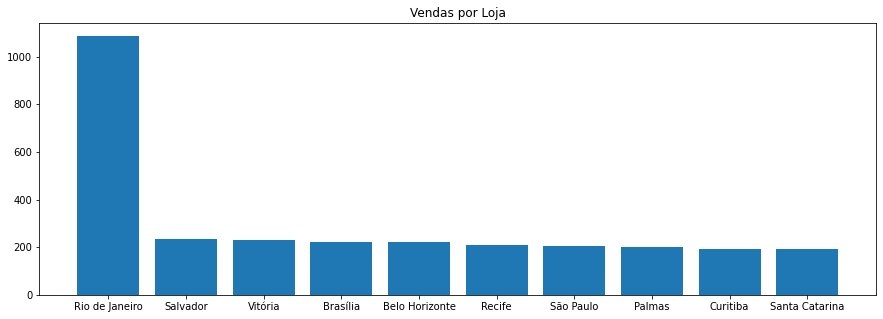

In [266]:
plt.figure(figsize=(15,5))

plt.bar(graf_dados_store.index, graf_dados_store.values)
plt.title('Vendas por Loja');

## ✔️ Produtos que mais vendem

In [267]:
graf_dados_product = df.groupby('produto_produto').count().produto_valor.sort_values(ascending=False)
graf_dados_product

produto_produto
laptop básico    1395
teclado           204
impressora        191
monitor           187
xxx-231a          182
laptop gamer      180
mouse             172
mesa              171
carregador        164
cadeira           154
Name: produto_valor, dtype: int64

### 📈 Matplotlib

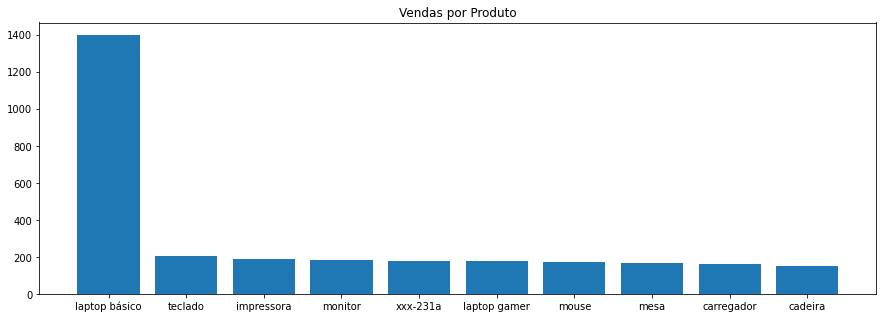

In [268]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados_product.index, graf_dados_product.values)
plt.title('Vendas por Produto');

## ✔️ Receita por Loja

In [269]:
graf_dados_revenue_store = df.groupby('loja_cidade').sum().produto_valor.sort_values(ascending=False)
graf_dados_revenue_store

loja_cidade
Rio de Janeiro    1.797907e+06
Brasília          3.779836e+05
Belo Horizonte    3.757225e+05
Salvador          3.752382e+05
Vitória           3.655850e+05
São Paulo         3.407579e+05
Recife            3.329236e+05
Palmas            3.168370e+05
Santa Catarina    3.133314e+05
Curitiba          3.032404e+05
Name: produto_valor, dtype: float64

> Também pode ser feito utilizando um filtro

In [270]:
df[['loja_cidade', 'produto_valor']].groupby('loja_cidade').sum().sort_values(ascending=False, by="produto_valor")

,produto_valor
loja_cidade,
Rio de Janeiro,1.797907e+06
Brasília,3.779836e+05
Belo Horizonte,3.757225e+05
Salvador,3.752382e+05
Vitória,3.655850e+05
São Paulo,3.407579e+05
Recife,3.329236e+05
Palmas,3.168370e+05
Santa Catarina,3.133314e+05


### 📈 Matplotlib

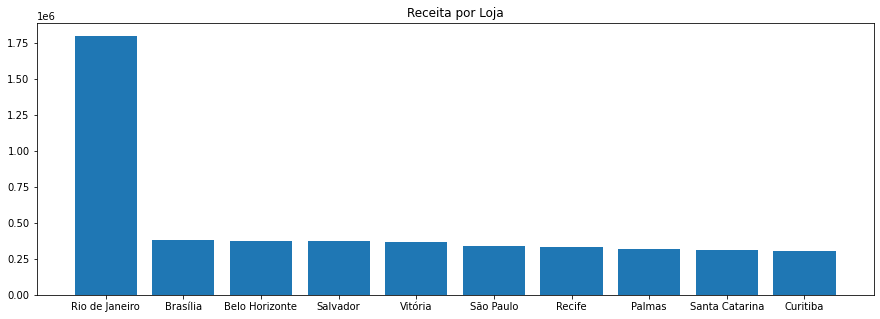

In [299]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados_revenue_store.index, graf_dados_revenue_store.values)
plt.title('Receita por Loja');

> Calculando quantos por cento na média essa receita gera

In [272]:
''' Passo 1 Dividimos os valores máximos da receia por loja pela média dos mesmos
    Passo 2 Criamos um filtro onde diferenciamos o valor máximo da receita dento da própria receita '''

graf_dados_revenue_store.max() / graf_dados_revenue_store[ graf_dados_revenue_store != graf_dados_revenue_store.max() ].mean()

5.217004250545965

In [273]:
print('O maior valor é de %i, sendo %.2f vezes a média dos demais, que é %i' % (graf_dados_revenue_store.max(), graf_dados_revenue_store.max() / graf_dados_revenue_store[ graf_dados_revenue_store != graf_dados_revenue_store.max() ].mean(), graf_dados_revenue_store[ graf_dados_revenue_store != graf_dados_revenue_store.max() ].mean()))

O maior valor é de 1797906, sendo 5.22 vezes a média dos demais, que é 344624


## ✔️ Receita por Produto

In [274]:
graf_dados_revenue_product = df[['produto_produto', 'produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending=False)
graf_dados_revenue_product 

produto_produto
laptop básico    3.208500e+06
laptop gamer     9.540000e+05
monitor          2.805000e+05
mesa             1.470600e+05
impressora       1.337000e+05
cadeira          8.316000e+04
xxx-231a         5.844661e+04
carregador       2.460000e+04
teclado          6.120000e+03
mouse            3.440000e+03
Name: produto_valor, dtype: float64

### 📈 Matplotlib

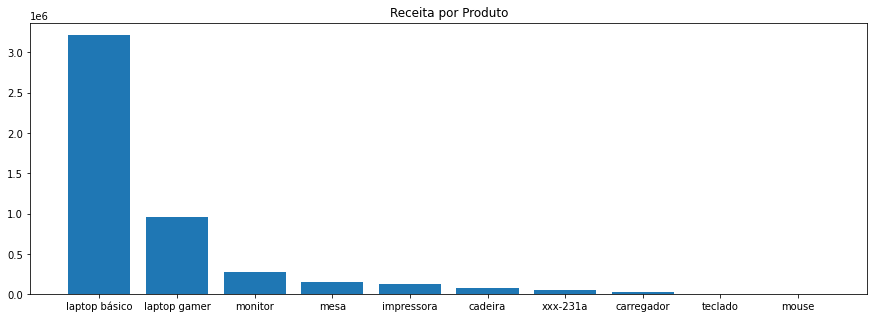

In [275]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados_revenue_product.index, graf_dados_revenue_product.values)
plt.title('Receita por Produto');

## ⚠️SUBPLOTS

> Definindo o tamanho das figuras

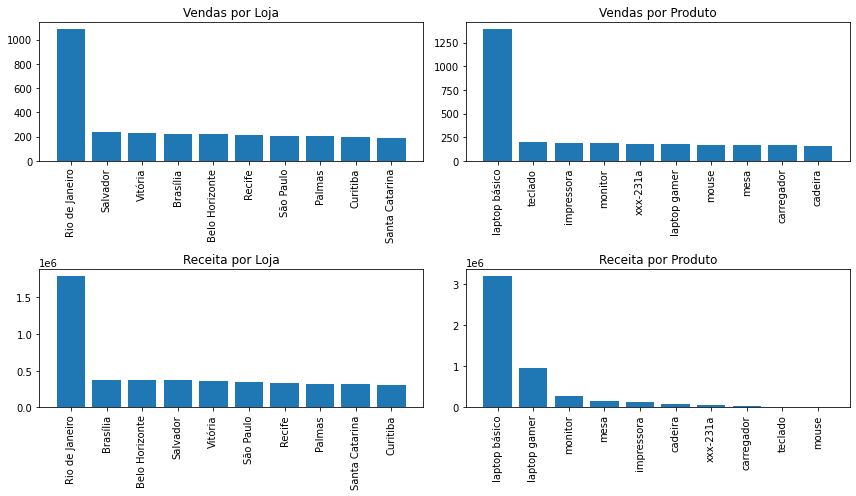

In [276]:
# Definindo o tamanho as proporções do Subplot

plt.figure(figsize=(12,7))

# 1º plot
plt.subplot(2,2,1)
graf_dados_store = df.groupby('loja_cidade').count().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados_store.index, graf_dados_store.values)
plt.title('Vendas por Loja')
plt.xticks(rotation=90)

# 2º plot
plt.subplot(2,2,2)
graf_dados_product = df.groupby('produto_produto').count().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados_product.index, graf_dados_product.values)
plt.title('Vendas por Produto')
plt.xticks(rotation=90)

# 3º plot
plt.subplot(2,2,3)
graf_dados_revenue_store = df.groupby('loja_cidade').sum().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados_revenue_store.index, graf_dados_revenue_store.values)
plt.title('Receita por Loja')
plt.xticks(rotation=90)

# 4º plot
plt.subplot(2,2,4)
graf_dados_revenue_product = df[['produto_produto', 'produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending=False)
plt.bar(graf_dados_revenue_product.index, graf_dados_revenue_product.values)
plt.title('Receita por Produto')
plt.xticks(rotation=90)

# Corrigindo os bugs gráficos de sobreposição

plt.tight_layout()

## ✔️ Receita por Cliente

In [277]:
graf_dados_revenue_client = df[['cliente_nome', 'produto_valor']].groupby('cliente_nome').sum().produto_valor.sort_values(ascending=False)
graf_dados_revenue_client

cliente_nome
Leila Costa         28970.0000
Melissa Lima        25892.2704
Lavinia Carvalho    25261.1352
Fernanda Pinto      24660.0000
Felipe Castro       22920.0000
                       ...    
Julieta Barros         20.0000
Thaís Pinto            20.0000
Giovana Barbosa        20.0000
Diego Sousa            20.0000
José Pinto             20.0000
Name: produto_valor, Length: 861, dtype: float64

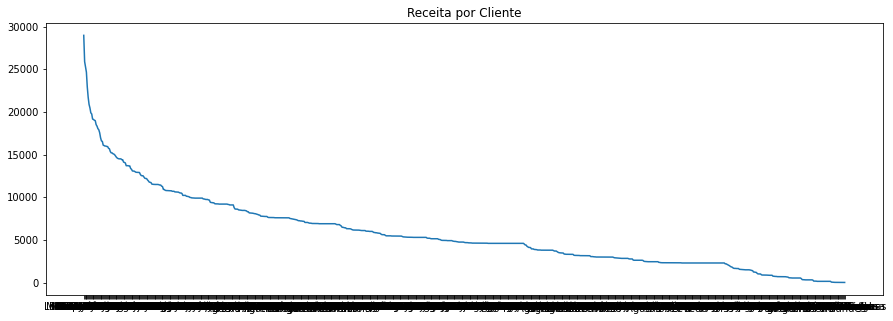

In [278]:
plt.figure(figsize=(15,5))
plt.plot(graf_dados_revenue_client.index, graf_dados_revenue_client.values)
plt.title('Receita por Cliente');

> Calculando o acumulado da receita

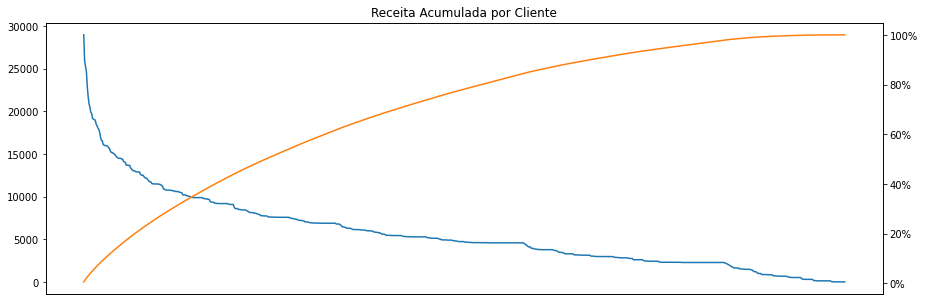

In [279]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(graf_dados_revenue_client.index, graf_dados_revenue_client.values, color='C0')
ax2 = ax.twinx() # Comando que cria um seguddo eixo, pois são dois gráficos sobrepostos

'''Eu pego a soma acumulada com o comando .cumsum(), 
e divido pela soma total da receita multiplicando por 100,
pois quero saber em porcentagem'''

ax2.plot(graf_dados_revenue_client.index, graf_dados_revenue_client.values.cumsum() / graf_dados_revenue_client.sum() * 100, color='C1')
ax2.yaxis.set_major_formatter(PercentFormatter())

# Retirando a poluição dos eixos ax dos dois gráficos

ax.axes.get_xaxis().set_visible(False)
ax2.axes.get_xaxis().set_visible(False)

plt.title('Receita Acumulada por Cliente');

⬆️ Como resolvemos ocultar as informações dos eixos x, não temos assim quais os clientes, mas sim que existem dados percentuais referentes a clientes que geram uma maior receita

- ✅ Com isso podemos calcular a receita acumulada dos clientes indo até 60% 

- ✅ Calculando a quantidade de clientes com o .count(), obtemos um toltal de 273 clientes que geram de té 60% de receita acumulada

- ✅ Dividindo pelo numéro total de clientes 'receita acumulada', obtemos aprox 32% dos clientes representam 60% da receita

In [280]:
receita_acumulada = graf_dados_revenue_client.cumsum() / graf_dados_revenue_client.sum()
receita_acumulada[receita_acumulada < 0.60].count() / receita_acumulada.count()

0.3170731707317073

### 📈 Gráfico de Pareto

Receita por Produto

In [281]:
graf_dados = df[['produto_produto', 'produto_valor']].groupby('produto_produto').sum().produto_valor.sort_values(ascending=False)
graf_dados                                                                                                                 

produto_produto
laptop básico    3.208500e+06
laptop gamer     9.540000e+05
monitor          2.805000e+05
mesa             1.470600e+05
impressora       1.337000e+05
cadeira          8.316000e+04
xxx-231a         5.844661e+04
carregador       2.460000e+04
teclado          6.120000e+03
mouse            3.440000e+03
Name: produto_valor, dtype: float64

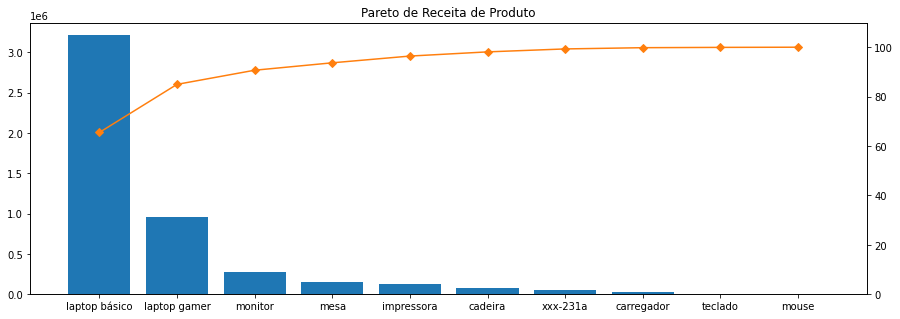

In [282]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(graf_dados.index, graf_dados.values, color='C0')
ax2 = ax.twinx()
ax2.plot(graf_dados.index, graf_dados.values.cumsum() / graf_dados.sum()*100, color='C1', marker='D')
plt.ylim(0,110)
plt.title('Pareto de Receita de Produto');

⬆️ Interessante visualizarmos que o Leptop Básico, representa aprox 70% das 
receitas vendas

⬆️ Juntamente com o Laptop Gamer, os dois chegam a ser 90% de toda a receita



## ✔️ Receita: Produto & Loja

> Existem diversas formar de criar o conjunto de dados que precisamos, loço for, groupby e até mesmo através de somas e somas condicionais, assim como no Excel.

> Dessa vez vamos trabalhar com um laço for, porém é bem mais recomendável trabalharmos com comando de groupby, comandos de soma do próprio Pandas isso garante uma melhor performace para o código.

In [289]:
'''Passo 1 Vamos criar um novo dataframe
   Passo 2 Criamos um laço for para preencher os dados da nova tabela
   Passo 3 Criamos um laço for para cidades  em que pegamso as informações das cidades do dataframe de df_lojas
   Passo 4 Também criamos um laço pegando as infos de produtos dentro de df_produtos
   Passo 5 Agora criamos um dcionários dentro da variável graf_dados, com os dados de loja, produto, receita
   Passo 6 Para as info de receita, fazemos um filtro que peaas paenas as informações de soma de 
   cidade dentro de df  coluna loja_cidade, e as infos de produto dentro de df coluna produto_produto
'''


graf_dados = pd.DataFrame(columns=('loja', 'produto', 'receita'))
for cidade in df_lojas.cidade:
  for produto in df_produtos.produto:
    graf_dados = graf_dados.append({
        'loja': cidade,
        'produto': produto,
        'receita': df.produto_valor[(df.loja_cidade == cidade) & (df.produto_produto == produto)].sum()
    }, ignore_index=True)
graf_dados 

,loja,produto,receita
0,São Paulo,mouse,300.0000
1,São Paulo,teclado,510.0000
2,São Paulo,laptop básico,223100.0000
3,São Paulo,laptop gamer,63600.0000
4,São Paulo,monitor,30000.0000
...,...,...,...
95,Vitória,impressora,8400.0000
96,Vitória,carregador,2100.0000
97,Vitória,cadeira,5400.0000
98,Vitória,mesa,12040.0000


### 📈 Seaborn

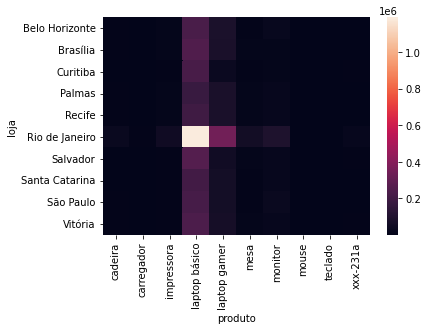

In [290]:
# Lembrando que para plotarmos é necessário converter os dados em uma tabela Pivot (Tabela Dinâmica)

graf_dados = graf_dados.pivot_table(index='loja', columns='produto', values='receita', aggfunc='sum')
sns.heatmap(graf_dados)

- Como a variavel foi modificada para o estilo Pivot, devemos voltar ao modo do laço for

In [291]:
graf_dados

produto,cadeira,carregador,impressora,laptop básico,laptop gamer,mesa,monitor,mouse,teclado,xxx-231a
loja,,,,,,,,,,
Belo Horizonte,6480.0,1800.0,11200.0,232300.0,84800.0,9460.0,25500.0,200.0,450.0,3532.4872
Brasília,6480.0,1350.0,9800.0,250700.0,79500.0,12040.0,13500.0,220.0,540.0,3853.6224
Curitiba,4320.0,1500.0,6300.0,227700.0,37100.0,9460.0,10500.0,280.0,300.0,5780.4336
Palmas,7020.0,1650.0,14000.0,179400.0,79500.0,10320.0,19500.0,240.0,390.0,4817.0280
Recife,8100.0,1650.0,9800.0,195500.0,79500.0,11180.0,22500.0,180.0,660.0,3853.6224
Rio de Janeiro,30240.0,8700.0,50400.0,1189100.0,344500.0,56760.0,96000.0,1280.0,1980.0,18946.9768
Salvador,4320.0,2250.0,9100.0,264500.0,53000.0,13760.0,22500.0,220.0,450.0,5138.1632
Santa Catarina,4320.0,2100.0,7700.0,204700.0,63600.0,6020.0,21000.0,200.0,480.0,3211.3520
São Paulo,6480.0,1500.0,7000.0,223100.0,63600.0,6020.0,30000.0,300.0,510.0,2247.9464


In [293]:
graf_dados = pd.DataFrame(columns=('loja', 'produto', 'receita'))
for cidade in df_lojas.cidade:
  for produto in df_produtos.produto:
    graf_dados = graf_dados.append({
        'loja': cidade,
        'produto': produto,
        'receita': df.produto_valor[(df.loja_cidade == cidade) & (df.produto_produto == produto)].sum()
    }, ignore_index=True)
graf_dados = graf_dados.sort_values(by="receita", ascending=False)
graf_dados 

,loja,produto,receita
12,Rio de Janeiro,laptop básico,1189100.0
13,Rio de Janeiro,laptop gamer,344500.0
62,Salvador,laptop básico,264500.0
72,Brasília,laptop básico,250700.0
92,Vitória,laptop básico,241500.0
...,...,...,...
70,Brasília,mouse,220.0
60,Salvador,mouse,220.0
40,Santa Catarina,mouse,200.0
30,Belo Horizonte,mouse,200.0


- Pronto agora para visualizarmos em um gráfico de barras não podemos ter 3 
dimensões

- Com esse novo comando estamos criando essa nova variavel lojaprod, que irá unir os dados de loja e produto separando-os por ífen

In [294]:
graf_dados['lojaprod'] = graf_dados.loja + '-' + graf_dados.produto
graf_dados

,loja,produto,receita,lojaprod
12,Rio de Janeiro,laptop básico,1189100.0,Rio de Janeiro-laptop básico
13,Rio de Janeiro,laptop gamer,344500.0,Rio de Janeiro-laptop gamer
62,Salvador,laptop básico,264500.0,Salvador-laptop básico
72,Brasília,laptop básico,250700.0,Brasília-laptop básico
92,Vitória,laptop básico,241500.0,Vitória-laptop básico
...,...,...,...,...
70,Brasília,mouse,220.0,Brasília-mouse
60,Salvador,mouse,220.0,Salvador-mouse
40,Santa Catarina,mouse,200.0,Santa Catarina-mouse
30,Belo Horizonte,mouse,200.0,Belo Horizonte-mouse


### 📈 Matplotlib

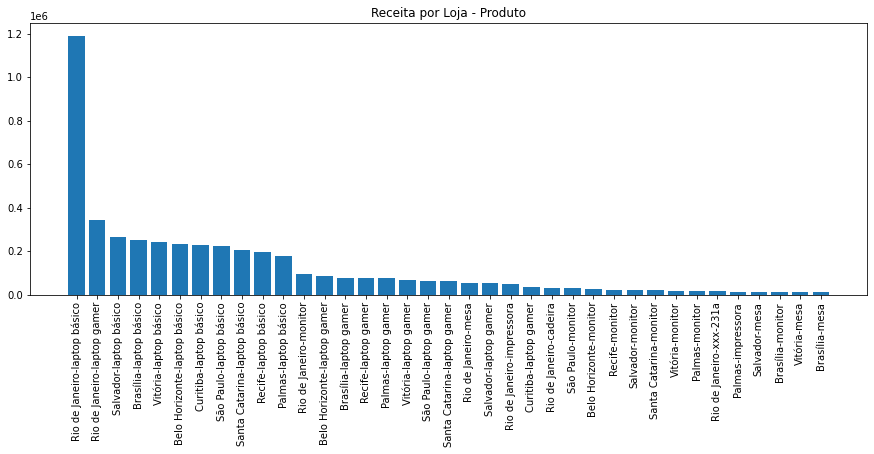

In [303]:
plt.figure(figsize=(15,5))
plt.bar(graf_dados.lojaprod[graf_dados.receita > 0.01 * graf_dados.receita.max()], graf_dados.receita[graf_dados.receita > 0.01 * graf_dados.receita.max()]);
plt.xticks(rotation=90)
plt.title('Receita por Loja - Produto')
plt.show()

# 📶 Análises de Tempo